In [1]:
import dataset

Initializing the data manager
Data manager initialization finished


In [2]:
# loading a locally stored dataset that contains 10 data points
data_set = dataset.load_data_set('../res/cache/datasets/dataset_10_2024-03-27_09-58-19') 

In [3]:
data_set

In [4]:
import model
import visualise

loading processing.2023-09-18 mapping from disk
loading processing.2023-10-24 mapping from disk


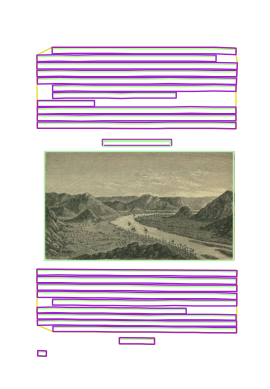

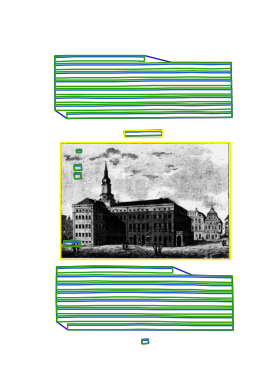

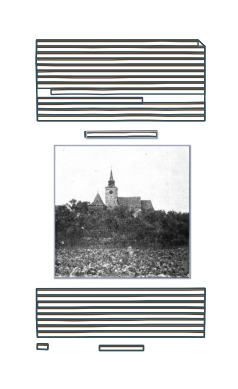

In [5]:
# plot a representation of a loaded document
for data_point in data_set[:3]:
    visualise.plot_text_regions(data_point)

In [6]:
model_results = [ model.compute_clip_probs(data_point) for data_point in data_set]

C:\Users\dadno\.virtualenvs\pythonProject1\Lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


In [7]:
model_results[:1]

[{<annotation.ImageAnnotation at 0x212d07b3610>: [(<parse_xml.TextLine at 0x212f04cc3d0>,
    0.9921595454216003),
   (<parse_xml.TextLine at 0x212f09aeed0>, 0.006751366425305605),
   (<parse_xml.TextLine at 0x212f09af390>, 0.0005598528659902513),
   (<parse_xml.TextLine at 0x212f09ad1d0>, 0.0003331366751808673),
   (<parse_xml.TextLine at 0x212f09afe90>, 6.689984002150595e-05),
   (<parse_xml.TextLine at 0x212f09af150>, 5.2334307838464156e-05),
   (<parse_xml.TextLine at 0x212f09af110>, 4.15715912822634e-05),
   (<parse_xml.TextLine at 0x212f09af010>, 1.1453970728325658e-05),
   (<parse_xml.TextLine at 0x212f09ae5d0>, 7.60318607717636e-06),
   (<parse_xml.TextLine at 0x212f09aec10>, 5.212378709984478e-06),
   (<parse_xml.TextLine at 0x212f09ae790>, 4.007789812021656e-06),
   (<parse_xml.TextLine at 0x212f09af210>, 3.949675829062471e-06),
   (<parse_xml.TextLine at 0x212f09af2d0>, 1.5489840734517202e-06),
   (<parse_xml.TextLine at 0x212f09adbd0>, 1.170267523775692e-06),
   (<parse_xml

In [8]:
eval_results = [model.eval_clip_result(dp, clip) for dp, clip in zip(data_set, model_results)]
eval_results

[{<annotation.ImageAnnotation at 0x212d07b3610>: 1.0},
 {<annotation.ImageAnnotation at 0x212f09d7e50>: 1.0},
 {<annotation.ImageAnnotation at 0x212f09f6150>: 1.0},
 {<annotation.ImageAnnotation at 0x212f0a0a450>: 0.07885304659498205},
 {<annotation.ImageAnnotation at 0x212f0a06710>: 0.9},
 {<annotation.ImageAnnotation at 0x212f0a62190>: 0.7542372881355932},
 {<annotation.ImageAnnotation at 0x212f0a76950>: 1.0},
 {<annotation.ImageAnnotation at 0x212f0a98a50>: 0.6363636363636364},
 {<annotation.ImageAnnotation at 0x212f0acf250>: 0.9732142857142857},
 {<annotation.ImageAnnotation at 0x212f0ae5810>: 0.38064516129032255}]